# [Phystech@DataScience](https://thetahat.ru/courses/ph-ds-2025-spr)
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейках, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  60 баллов
* Задача 2 &mdash;  60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  30 баллов
* Задача 4 &mdash;  30 баллов



-----

In [ ]:
# Bot check

# HW_ID: phds_hw11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

from IPython.display import clear_output

from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

---
## <b><font color="blue">Легкая часть</font></b>
### Задача 1

#### *Профиль биология*

Мы будем исследовать датасет по экспрессиям различных генов (RNA-seq), используемых для предсказания возраста пациентов.

In [ ]:
df = pd.read_csv("Rnaseq_age_reg.csv")
df.head()

Разбейте датасет на признаки и таргет, где в качестве таргета будет использоваться столбец `Age`, а признаки - все остальные. В том числе разбейте на подвыборки для обучения и теста.

**Переходите к общей части.**

#### *Профиль физика*

In [12]:
df = pd.read_csv("physics_data.csv", index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Eat
pubchem_id,,,,,,,,,,,,,,,,,,,,,
25004,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,-2.653680,...,-0.028997,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,-19.013763
25005,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,18.387221,...,-0.006840,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,-10.161019
25006,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,-0.927953,...,-0.004305,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,-9.376619
25009,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,3.657935,...,0.028996,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,-13.776438
25011,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,-0.181278,...,0.004552,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,-8.537140


Разбейте датасет на признаки и таргет, где в качестве таргета будет использоваться столбец Eat, а признаки - все остальные. В том числе разбейте на подвыборки для обучения и теста.

In [42]:
X = df.drop(columns=['Eat'])
y = df['Eat']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Общая часть

Отмасштабируйте данные:

In [44]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучите модель линейной регрессии и посмотрите на значения метрик на тесте. Что вы можете сказать про результат обучения?

In [45]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

metrics = {
    "MAPE": mean_absolute_percentage_error(y_test, y_pred),
    "R²": r2_score(y_test, y_pred)
}

print("Метрики качества модели:")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")

Метрики качества модели:
MAPE: 0.2243
R²: -5.7322


Обучите линейные модели с регуляризациями, которые мы проходили ранее. Для каждой из моделей постройте графики зависимости метрик r2 и MAPE от коэфициента регуляризации. Можно пользоваться кодом из домашнего задания по регуляризации. Сильно ли улучшился результат?

In [ ]:
alpha_values = np.logspace(-6, 1, 50)

models = {
    'L1 (Lasso)': Lasso(max_iter=10000),
    'L2 (Ridge)': Ridge(),
    'ElasticNet': ElasticNet(l1_ratio=0.5, max_iter=10000)
}

metrics = {
    'R2': {'train': [], 'test': []},
    'MAPE': {'train': [], 'test': []}
}

In [ ]:
for model_name, model in models.items():
    r2_train = []
    r2_test = []
    mape_train = []
    mape_test = []

    for alpha in alpha_values:
        model.set_params(alpha=alpha)

        model.fit(X_train_scaled, y_train)

        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

        r2_train.append(r2_score(y_train, y_pred_train))
        r2_test.append(r2_score(y_test, y_pred_test))

        eps = 1e-10
        mape_train.append(mean_absolute_percentage_error(y_train + eps, y_pred_train + eps))
        mape_test.append(mean_absolute_percentage_error(y_test + eps, y_pred_test + eps))

    metrics['R2']['train'].append(r2_train)
    metrics['R2']['test'].append(r2_test)
    metrics['MAPE']['train'].append(mape_train)
    metrics['MAPE']['test'].append(mape_test)

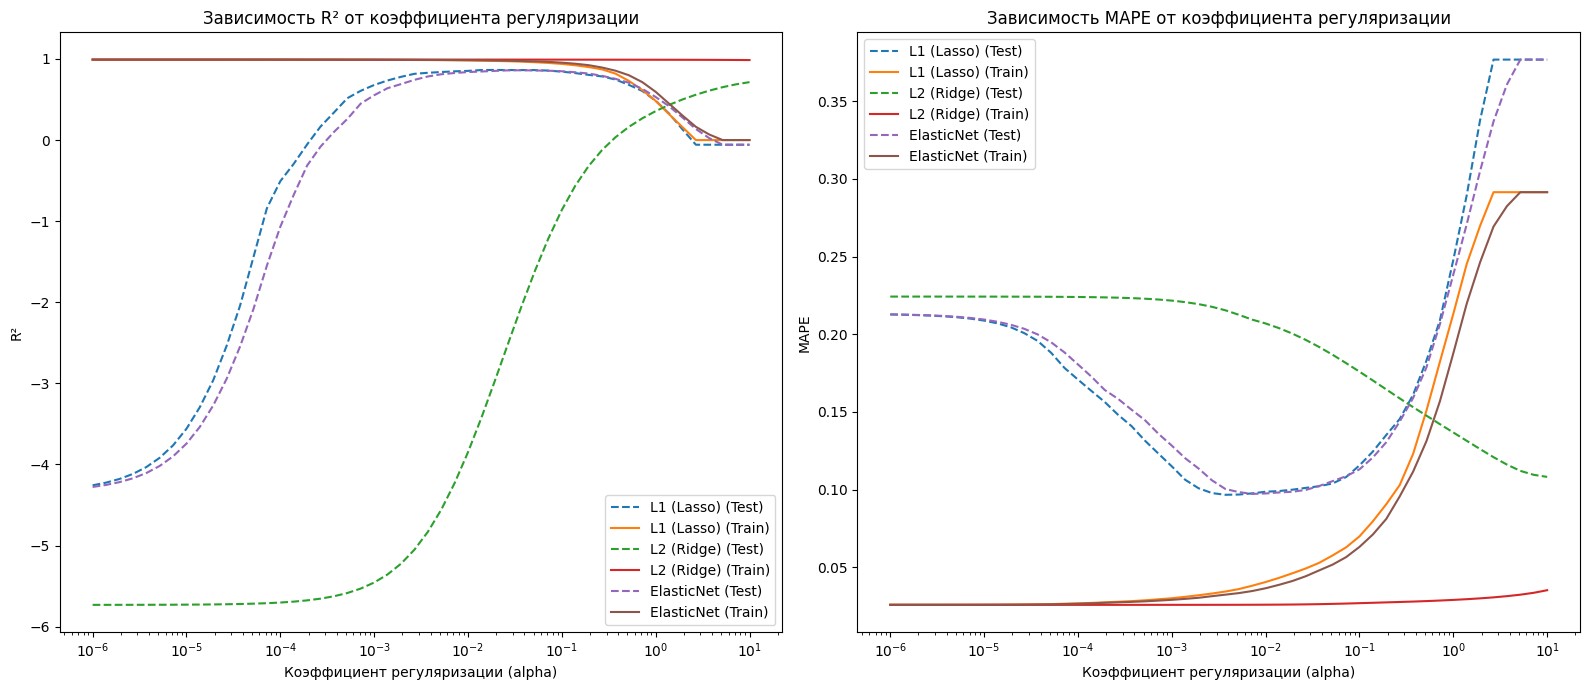

In [ ]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
for i, (model_name, _) in enumerate(models.items()):
    plt.semilogx(alpha_values, metrics['R2']['test'][i],
                label=f'{model_name} (Test)', linestyle='--')
    plt.semilogx(alpha_values, metrics['R2']['train'][i],
                label=f'{model_name} (Train)', linestyle='-')

plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('R²')
plt.title('Зависимость R² от коэффициента регуляризации')
plt.legend()

plt.subplot(1, 2, 2)
for i, (model_name, _) in enumerate(models.items()):
    plt.semilogx(alpha_values, metrics['MAPE']['test'][i],
                label=f'{model_name} (Test)', linestyle='--')
    plt.semilogx(alpha_values, metrics['MAPE']['train'][i],
                label=f'{model_name} (Train)', linestyle='-')

plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от коэффициента регуляризации')
plt.legend()

plt.tight_layout()
plt.show()

Выберите оптимальный, на вашь взгляд, параметр для L1-регуляризации, обучите модель Lasso-регрессии, выведите ещё раз метрики r2 и MAPE и проведите отбор признаков: уберите из датасета все те, для которых коэффициент регрессии оказался нулевым.

In [ ]:
alpha = 1e-2
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"MAPE: {mape_score}")

R2 Score: 0.8533520030081307
MAPE: 9.865858082722818


In [ ]:
coefficients = lasso.coef_
print("Coefficients before feature selection:", coefficients)

features_to_drop = X.columns[np.abs(coefficients) < 1e-1]

print("Features to drop:", features_to_drop)

X_reduced = X.drop(features_to_drop, axis=1)

print("Shape of X before:", X.shape)
print("Shape of X after:", X_reduced.shape)

print("Remaining features:", X_reduced.columns)

Coefficients before feature selection: [ 1.42691540e-01 -1.55285294e+00 -2.26212510e+00  1.05252428e+00
  1.23212844e-01 -0.00000000e+00  5.14898765e-01 -4.08529830e-02
  4.59596417e-02  1.99613466e-01  7.01709238e-02  1.30714680e-01
 -0.00000000e+00 -3.01528592e-03 -1.46011631e-02 -2.73685157e-02
 -1.03596100e-01 -5.30614712e-02 -0.00000000e+00 -4.04797019e-02
 -8.78285795e-02 -4.20731630e-01  5.40089141e-02 -7.34534644e-02
  3.00727691e-01  3.88490981e-01 -3.32704269e-01  7.99191692e-01
  3.48620853e-01 -2.23398641e-01  6.11811131e-02 -0.00000000e+00
  3.35516010e-02  0.00000000e+00  1.99000551e-01  1.40212423e-02
 -0.00000000e+00  1.11842756e-03 -0.00000000e+00 -5.62651480e-02
  2.92943342e-02  2.47812215e-01  1.13962539e-01 -9.16498795e-02
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.93345450e-02 -2.32412975e-02 -1.89010102e-02 -6.63377665e-02
  1.90835207e-02  0.00000000e+00 -0.00000000e+00 -1.15539880e-01
 -0.00000000e+00  1.28001187e-01  3.05532672e-03  0

In [ ]:
X_train_r, X_test_r, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

Теперь обучите простейшую нейронную сеть на уменьшенном датасете, сравните результат с результатами обучения других моделей.

**Подсказка** Используйте nn.Sequential()

In [ ]:
scaler = StandardScaler()

X_trainrs = scaler.fit_transform(X_train_r)
X_testrs = scaler.transform(X_test_r)

In [ ]:
X_train_tensor = torch.tensor(X_trainrs, dtype=torch.float32)
X_test_tensor = torch.tensor(X_testrs, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

size = X_train_tensor.shape[1]

In [ ]:
model = nn.Sequential(
    nn.Linear(in_features=size, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8, out_features=1),
)

model

Sequential(
  (0): Linear(in_features=23, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
optim_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
for name, param in model.named_parameters():
    if "weight" in name:
        nn.init.uniform_(param, a=-0.1, b=0.1)
    elif "bias" in name:
        nn.init.constant_(param, 0.0)

param_groups = [
    {"params": [p for name, p in model.named_parameters() if "weight" in name], "lr": 0.01},
    {"params": [p for name, p in model.named_parameters() if "bias" in name], "lr": 0.05},
]

In [ ]:
epochs = 2000
for epoch in range(epochs):
    y_pred_tensor = model(torch.FloatTensor(X_trainrs))
    loss = optim_func(y_pred_tensor, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 200 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [200/2000], Loss: 0.4042
Epoch [400/2000], Loss: 0.2689
Epoch [600/2000], Loss: 0.2191
Epoch [800/2000], Loss: 0.1909
Epoch [1000/2000], Loss: 0.1680
Epoch [1200/2000], Loss: 0.1495
Epoch [1400/2000], Loss: 0.1356
Epoch [1600/2000], Loss: 0.1244
Epoch [1800/2000], Loss: 0.1146
Epoch [2000/2000], Loss: 0.1060


In [ ]:
with torch.no_grad():
    y_pred = model(torch.FloatTensor(X_testrs)).numpy()

print(f'R2: {round(r2_score(y_test, y_pred), 3)} \nMAPE: {round(mean_absolute_percentage_error(y_test, y_pred), 3)}')

R2: 0.888 
MAPE: 0.081


**Вопрос:** объясните полученный результат.

**Ответ:** Полученные значения метрик показывают, что данные тяжело предсказать, требуется подбор гиперпараметров. Скорее всего проблема в недостаточном количестве данных в датасете. При увеличении количества эпох лосс сильно уменьшается, но результаты на тестовой выборке не улучшаются, что говорит о переобучении, поэтому количество нейронов уменьшаем, пока при большом количестве эпох не исчезнет перобучение

Сравните все модели, поясняя полученные результаты и значения метрик.

**Вывод:** Линейная регрессия без регуляризации показала плохие результаты, проблема в переобучении и слишком большом количестве признаков длятакого  небольшого набора данных. После применения регуляризации лишние признаки отбросились и модель смогла получить хороший результат, достигнув r2 больше 0.85, что достаточно близко к 1 - идеальному результату. Нейросеть смогла получить результат, почти такой же как регулируемая линейная модель. Это может значить, что результат близок к максимальному, который возможно получить, а линейная регрессия способна справиться с задачей на уровне нейросети.

---
### Задача 2
#### *Профиль физика*

Скачайте [датасет](https://www.kaggle.com/datasets/omidbaghchehsaraei/identification-of-two-modes-of-z-boson?resource=download), описывающий распады Z-бозонов двух типов: `Zee`и `Zmumu`. Создайте и обучите нейросеть, разделяющую эти два класса.


In [ ]:
data = pd.read_csv('Z_boson.csv')
data.head()

,Unnamed: 0,Run,Event,pt1,eta1,phi1,Q1,pt2,eta2,phi2,Q2,class
0,0,166784,20257329,42.9130,-1.3248,-3.0057,-1,42.2897,-0.6624,0.3485,1,Zmumu
1,1,163261,64679856,39.8744,-0.0057,-0.7744,-1,36.3997,1.3710,2.2952,1,Zee
2,2,165570,196860468,72.9296,-0.4162,0.9198,1,39.5410,-0.2680,-1.4629,1,Zee
3,3,172163,497791581,33.4436,0.3063,-1.6034,1,27.2395,-1.6182,1.5315,-1,Zee
4,4,173692,550966077,43.9826,0.4276,-0.3876,-1,29.7856,-0.3080,2.8965,1,Zmumu


Удалите столбцы `Unnamed: 0`, `Run` и `Event`, так как это не физические величины. Удалите строки, где есть пропуски, если таковые имеются.

In [ ]:
data = data.drop(columns=['Unnamed: 0', 'Run', 'Event'], errors='ignore')

data = data.dropna()

data.shape

(20000, 9)

Также можно как-нибудь взглянуть на признаки. Возможно, не все они вносят вклад в разделение классов. Не забудьте преобразовать таргет (столбец `class`) к формату 0 и 1. Вам может пригодиться `sklearn.preprocessing.LabelBinarizer`.


<Figure size 2000x1000 with 0 Axes>

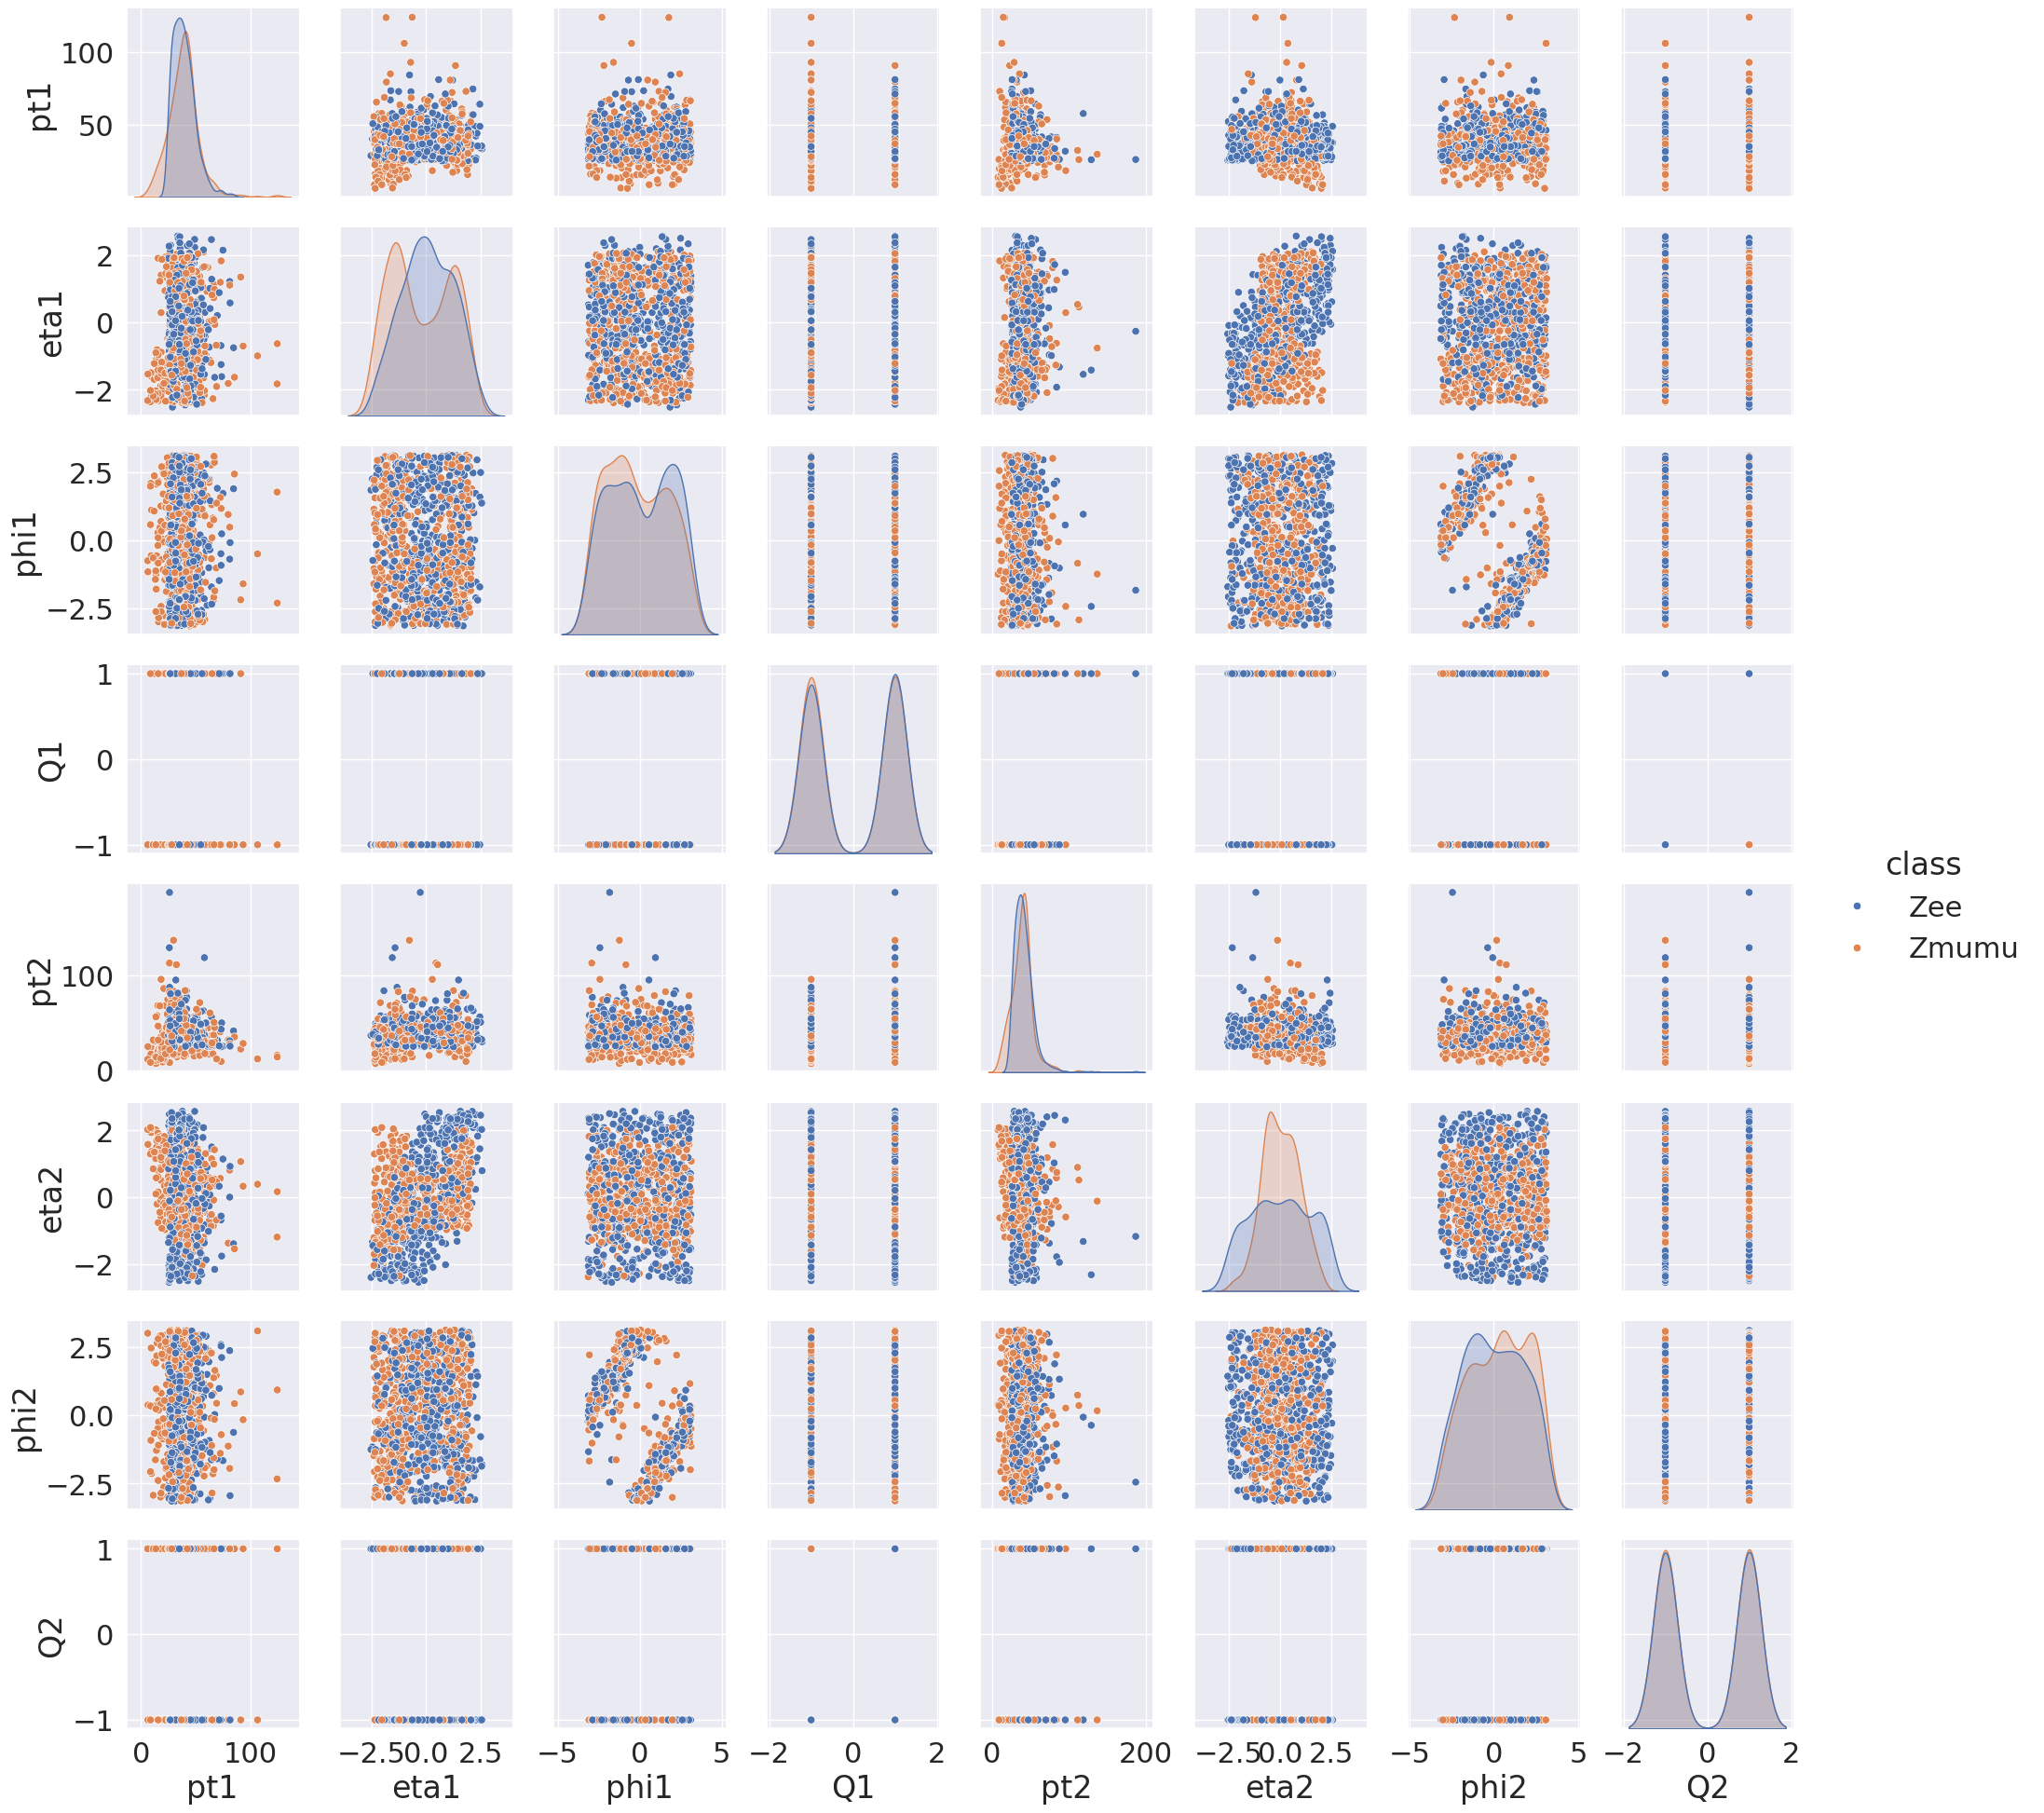

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(font_scale=2.0)
sns.pairplot(data.sample(1000), hue="class", palette="deep")

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [ ]:
# исходя из графиков, отберём признаки для обучения
selected_features = ["pt1", "eta1", "phi1", "eta2", "phi2"]
X = data[selected_features]

In [ ]:
# таргет преобразуем из строк "Zee", "Zmumu" к 0 и 1
y = np.asarray(data['class'].map({'Zee': 0, 'Zmumu': 1}))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, train_size=0.5)
y

array([1, 0, 0, ..., 0, 0, 1])

**Переходите к общей части.**

### Профиль биология

Скачайте [датасет](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset), описывающий влияние курения и алкоголя на человека. Создайте и обучите нейросеть, разделяющую эти два класса.

In [ ]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")

In [ ]:
df.describe()

In [ ]:
df.columns, df.shape

In [ ]:
column_names = df.columns[1:-2]# нам не нужны гендер и таргеты сейчас

In [ ]:
column_names

Попробуем классифицировать людей с плохими привычками и без них, чтобы облегчить нам задачу. Для этого создадим дополнительный столбец в таблице, который будет содержать информацию о том, имеет ли человек вредные привычки или нет.

In [ ]:
def smoking_preprocessing(x):
  if x == 3 or x == 2:
    return 1
  else:
    return 0

def drinking_preprocessing(x):
  if x == 'Y':
    return 1
  else:
    return 0

In [ ]:
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].apply(func = smoking_preprocessing)
df['DRK_YN'] = df['DRK_YN'].apply(func = drinking_preprocessing)

In [ ]:
df['bad_habits'] = df['DRK_YN']+df['SMK_stat_type_cd']-df['DRK_YN']*df['SMK_stat_type_cd']

Теперь смотрим на разделение по привычкам

In [ ]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[:7])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

In [ ]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[7:15])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

In [ ]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[15:])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

In [ ]:
target_1 = df.pop('SMK_stat_type_cd')
target_2 = df.pop('DRK_YN')
target_3 = df.pop('bad_habits')

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [ ]:
# исходя из графиков, отберём признаки для обучения (нас интересуют вредные привычки)
selected_features = [<...>]
X = data[selected_features]

In [ ]:
# данных очень много, поэтому для экономии времени автор ноутбука отводит на обучение всего треть датасета
X_train, X_test, y_train, y_test = train_test_split(X, target_3, train_size=0.3)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, train_size=0.3)

## Общая часть

Как вы помните, в задаче классификации предсказывается вероятность. На основании этой вероятности можно делать вывод о принадлежности объекта к тому или иному классу. Причём не всегда используется порог $P=0.5$. Например, если классы несбалансированы, это значение можно варьировать на интервале (0, 1). Предоставляем вам возможность самим выбрать этот порог и поэкспериментировать.

In [ ]:
class_lim_proba = 0.5 # критерий принадлежности к тому или иному классу

Стандартизируйте данные

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_val_tensor = torch.FloatTensor(X_val_scaled)
y_val_tensor = torch.FloatTensor(y_val).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)
len(X_train_tensor)

16000

Напишем функцию для отрисовки кривых обучения. На одном графике расположим значение функции потерь на трейне и валидации, а на другом &mdash; значение метрики качества на ваш выбор, также для трейна и валидации.

In [53]:
def plot_learning_curves(history):
    '''
    Функция для отображения лосса и метрики во время обучения.
    '''
    clear_output(wait=True)

    fig = plt.figure(figsize=(20, 7))
    fontsize = 15   # размер шрифта

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=fontsize)
    plt.plot(history['loss_train'], label='train')
    plt.plot(history['loss_val'],   label='val')
    plt.ylabel('лосс',  fontsize=fontsize)
    plt.xlabel('эпоха', fontsize=fontsize)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Метрика', fontsize=fontsize)
    plt.plot(history['metric_train'], label='train')
    plt.plot(history['metric_val'],   label='val')
    plt.ylabel('Значение метрики', fontsize=fontsize)
    plt.xlabel('эпоха',    fontsize=fontsize)
    plt.legend()
    plt.show()

Напишите функцию метрики, которую вы будете использовать, например accuracy.

In [ ]:
def metric(y_true, y_pred):
    y_pred_classes = (y_pred >= class_lim_proba).astype(int)

    return accuracy_score(y_true, y_pred_classes)

#### Создание модели.
В семинаре вы у промежуточных слоёв задавали `in_features = out_features = 1`, а в данном случае вам надо будет создать нейросеть из нескольких слоёв, поставив только у последнего из них `out_features = 1`.

Какой должна быть размерность входа первого слоя?

In [ ]:
model = nn.Sequential(
    nn.Linear(in_features=X_train_tensor.shape[1], out_features=32),
    nn.ReLU(),
    nn.Linear(in_features=32, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=1),
    nn.Sigmoid(),
)

model

Sequential(
  (0): Linear(in_features=5, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

#### Обучение

В качетсве функции потерь возьмите [бинарную кросс-энтропию](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html), а шаг градиентного спуска установите равным 0.5. Можете взять и другие loss и `lr`, если хотите поэкспериментировать.

In [ ]:
optim_func = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

In [ ]:
for name, param in model.named_parameters():
    if "weight" in name:
        nn.init.uniform_(param, a=-0.1, b=0.1)
    elif "bias" in name:
        nn.init.constant_(param, 0.0)

param_groups = [
    {"params": [p for name, p in model.named_parameters() if "weight" in name], "lr": 0.01},
    {"params": [p for name, p in model.named_parameters() if "bias" in name], "lr": 0.05},
]

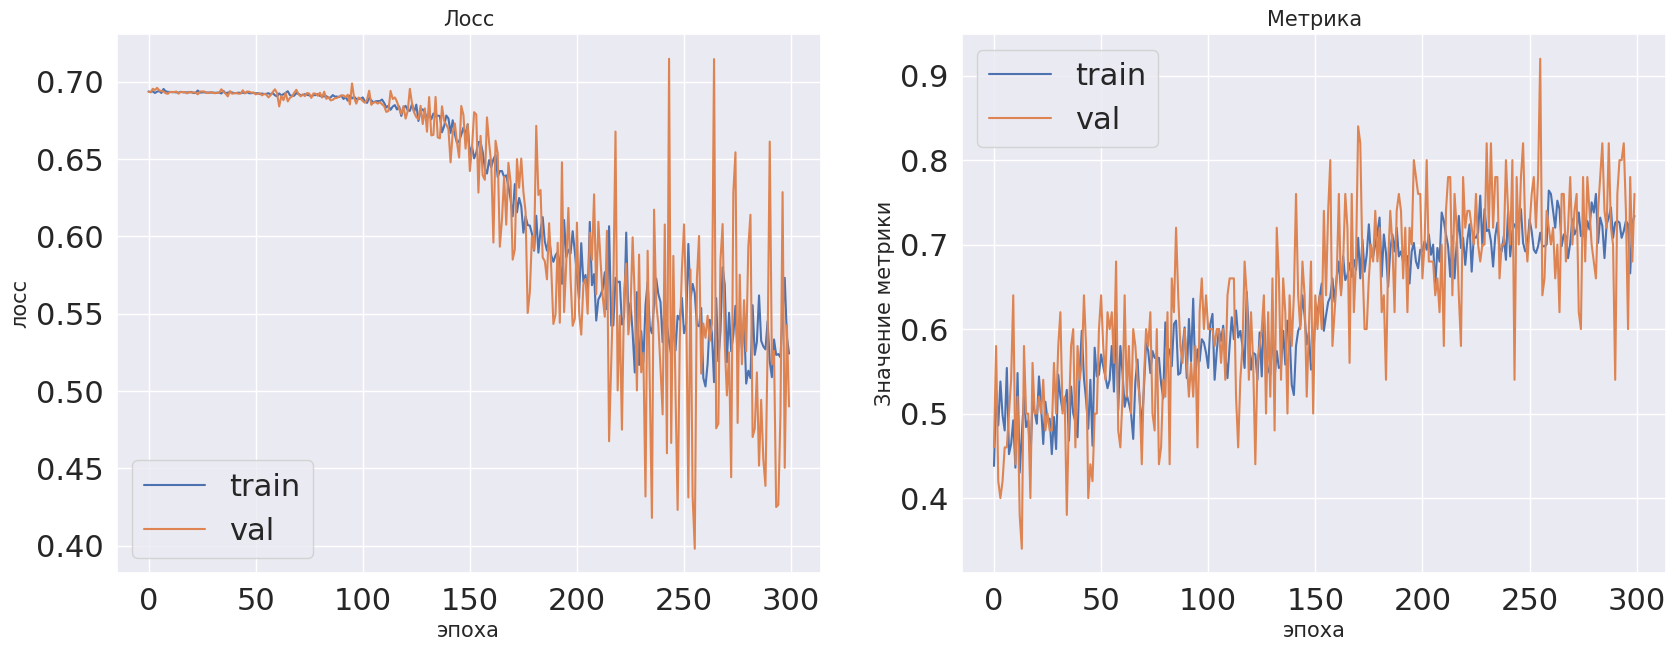

In [ ]:
batch_size = 500 # этот
num_iter = 300    # и этот параметры можете также поварьировать
history = {
    'loss_train': [],
    'loss_val': [],
    'metric_train': [],
    'metric_val': [],
}

for i in range(num_iter):

    # Так как размер выборки слишком велик, то будем обучать лишь на части данных
    indexes_train = np.random.choice(np.arange(len(X_train_tensor)), batch_size, replace=False)
    local_X_train = X_train_tensor[indexes_train]
    local_y_train = y_train_tensor[indexes_train]

    indexes_val = np.random.choice(np.arange(len(X_val_tensor)), batch_size//10, replace=False)
    local_X_val = X_val_tensor[indexes_val]
    local_y_val = y_val_tensor[indexes_val]

    # Forward pass: предсказание модели по данным X_train
    y_pred_train = model(local_X_train)
    with torch.no_grad():
        y_pred_val = model(local_X_val)


    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss_train = optim_func(y_pred_train, local_y_train)
    with torch.no_grad():
        loss_val = optim_func(y_pred_val, local_y_val).item()

    # Backward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss_train.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    # Считаем метрику на эпохе (здесь посчитана accuracy, можете реализовать любую другую за доп. баллы)
    metric_train = torch.mean(((y_pred_train >= class_lim_proba) == local_y_train.bool()).float()).item()
    metric_val = torch.mean(((y_pred_val >= class_lim_proba) == local_y_val.bool()).float()).item()

    # Сохраняем результаты эпохи
    history['loss_train'].append(loss_train.item())
    history['loss_val'].append(loss_val)
    history['metric_train'].append(metric_train)
    history['metric_val'].append(metric_val)

    # График Метрики + Лосса для трейна и валидации каждую итерацию
    plot_learning_curves(history)


Тестирование

In [ ]:
with torch.no_grad():
    y_pred_test = model(X_test_tensor)

    loss_test = optim_func(y_pred_test, y_test_tensor).item()

    pred_labels_test = (y_pred_test >= class_lim_proba).float()
    metric_test = metric(np.asarray(y_test_tensor), np.asarray(y_pred_test))


print(f"Test Loss: {loss_test:.4f} \nTest Accuracy: {metric_test:.4f}")

Test Loss: 0.5412 
Test Accuracy: 0.7295


**Выводы:** модель с трудом справляется с предсказанием (точность 70 процентов), судя по совпадению валидации с трейновыми метриками, переобучения нет, возможно требуется лучший подбор гиперпараметров (меньший лр), более сложная модель или дополнительная обработка данных

---
## <b><font color="orange">Сложная часть</font></b>
### Задача 3

В этой задаче мы будем вручную реализовывать усложнение для линейной регрессии, которое вы рассматривали на семинаре.

Запрещено использовать torch.nn (саму библиотеку torch использовать можно и нужно). Чтобы иметь перед глазами оставим здесь формулы:

$$\widehat{y}(x) = w_1u(x) + b_1,$$

$$u(x) = \sigma(w_0x + b_0),$$

$$\sigma(x) = \text{ReLU}(x) = \begin{equation*}\begin{cases}x, \; x \ge 0, \\ 0, \; \text{иначе,} \end{cases} \end{equation*}$$

$w_0, b_0 \in \mathbb{R}$ &mdash; обучаемые параметры первого слоя, $w_1, b_1 \in \mathbb{R}$ &mdash; обучаемые параметры второго слоя, $\sigma(x)$ &mdash; функция активации, в данном случае мы выбрали `ReLU`.

Реализуйте функцию активации:

In [46]:
def act_func(x):
     return torch.relu(x)

Задайте оптимизируемую функцию / функцию ошибки / лосс — [MSE](https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества):

$$
    MSE(\widehat{y}, y) = \frac{1}{n}\sum_{i=1}^n\left(\widehat y_i - y_i\right)^2
$$

In [47]:
def optim_func(y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)

Обучите вашу модель на данных профиля, которые вы выбрали в 1-й задаче. Выберите **1** признак, на котором проводите обучение.

In [48]:
X = df[['0']]
y = df[['Eat']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler1 = StandardScaler()

X_train_scaled = scaler1.fit_transform(X_train)
X_test_scaled = scaler1.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(np.asarray(y_train))
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(np.asarray(y_test))

In [62]:
# Инициализация параметров
w0 = torch.randn(1, requires_grad=True)
b0 = torch.randn(1, requires_grad=True)
w1 = torch.randn(1, requires_grad=True)
b1 = torch.randn(1, requires_grad=True)

# Количество итераций
num_iter = 1000

# Скорость обучения для параметров
lr_w = 0.01
lr_b = 0.05

for i in range(num_iter):

    # Forward pass: предсказание модели
    u = act_func(w0 * X_train_tensor + b0)
    y_pred = w1 * u + b1

    # Вычисление оптимизируемой функции (MSE)
    loss = optim_func(y_pred, y_train_tensor)
    # Bakcward pass: вычисление градиентов
    loss.backward()

    # Оптимизация: обновление параметров
    with torch.no_grad():
        w0 -= lr_w * w0.grad
        b0 -= lr_b * b0.grad
        w1 -= lr_w * w1.grad
        b1 -= lr_b * b1.grad

    # Зануление градиентов
    w0.grad.zero_()
    b0.grad.zero_()
    w1.grad.zero_()
    b1.grad.zero_()

    if i % 100 == 0:
        print(f'Epoch {i}, Loss: {loss.item():.4f}')


Epoch 0, Loss: 136.9209
Epoch 100, Loss: 12.2443
Epoch 200, Loss: 11.3384
Epoch 300, Loss: 11.2070
Epoch 400, Loss: 11.1824
Epoch 500, Loss: 11.1768
Epoch 600, Loss: 11.1751
Epoch 700, Loss: 11.1743
Epoch 800, Loss: 11.1736
Epoch 900, Loss: 11.1730


In [63]:
with torch.no_grad():
    u_t = act_func(w0 * X_test_tensor + b0)
    y_pred_t = w1 * u_t + b1

print(f'R2: {round(r2_score(y_test_tensor, y_pred_t), 3)} \nMAPE: {round(mean_absolute_percentage_error(y_test_tensor, y_pred_t), 3)}')

R2: -0.031 
MAPE: 0.371


**Вывод:** результат на тестовых данных ближе всего к результатам линейной регрессии без регуляризации, отличие в том, что здесь мы обучались по одному случайно выбранному признаку, из-за чего высоких показателей метрик и не ожидалось. Показатель MAPE не слишком велик, что значит, что модель смогла выявить зависимости. В целом модель более гибкая, чем линейная регрессия за счет нелинейных преобразований ReLU. Обучение прошло быстро, тк число параметров мало, лосс почти не изменялся после 500 эпохи, их число можно сократить.

---
### Задача 4

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронку можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$





**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

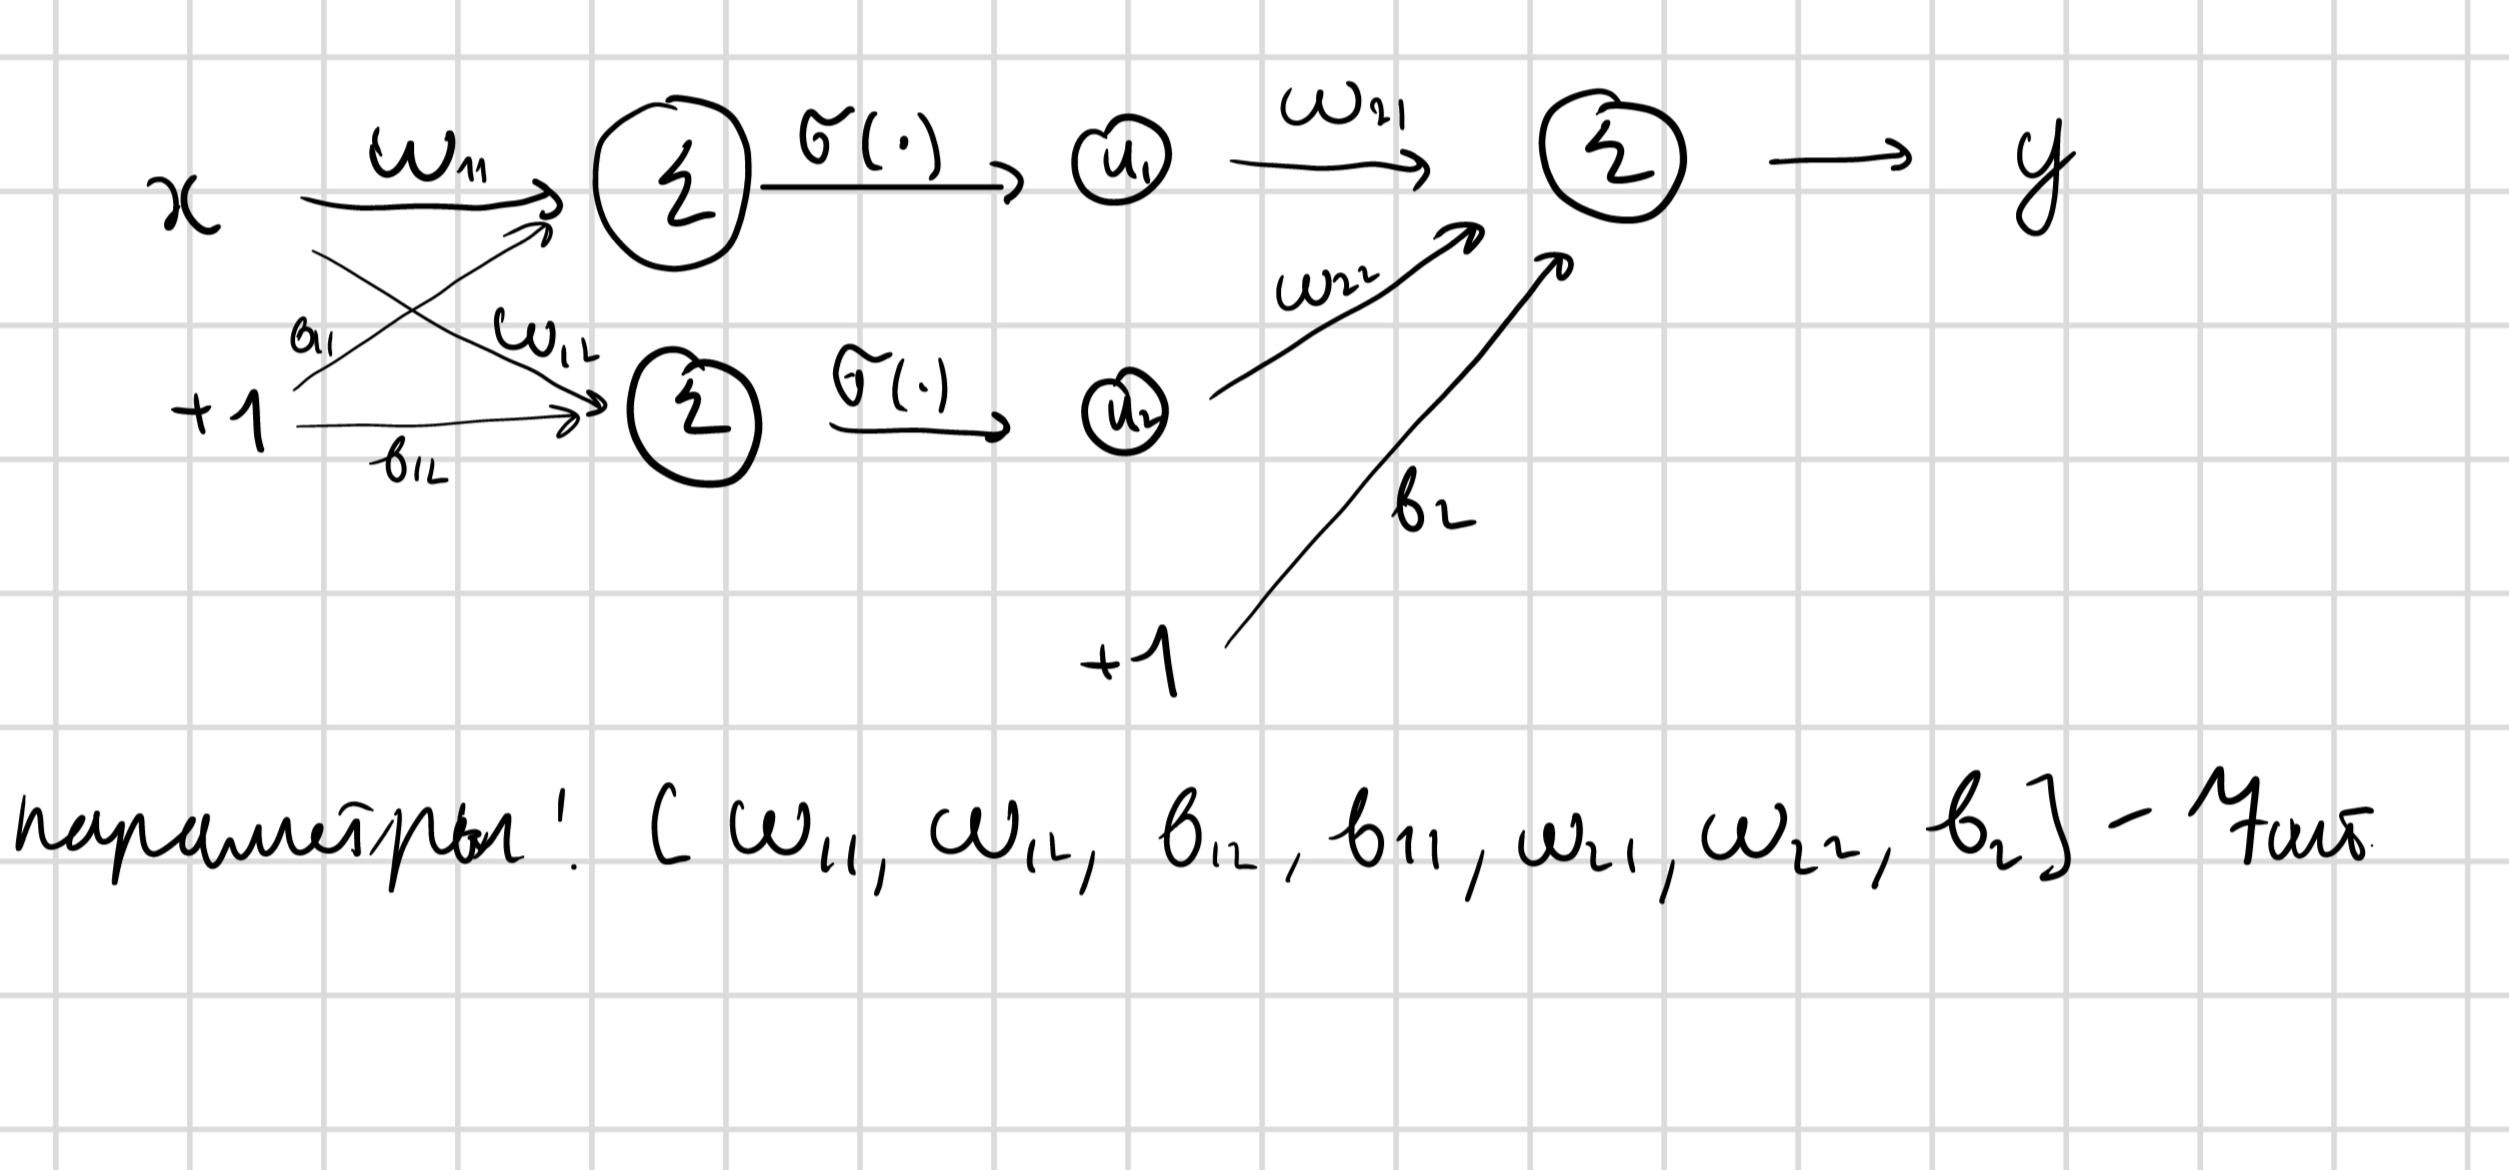

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.


**2.1.** Начнем с производной MSE по выходам сети:
$$
\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \frac{\partial MSE}{\partial \hat{y}(X_i)} = \frac{1}{n} \sum_{i=1}^n \frac{\partial}{\partial \hat{y}(X_i)} (Y_i - \hat{y}(X_i))^2 = \frac{\partial MSE}{\partial \hat{y}(X_i)} = -\frac{2}{n} (Y_i - \hat{y}(X_i))
$$




**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \frac{\partial}{\partial w_{2h}} \left( \sum_{k=1}^2 w_{2k} u_k(X_i) + b_2 \right) = u_h(X_i)$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \frac{\partial}{\partial b_2} \left( \sum_{h=1}^2 w_{2h} u_h(X_i) + b_2 \right) = 1$$

Также выпишем производные выходов сети по входам последнего слоя:

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \frac{\partial}{\partial u_h(X_i)} \left( \sum_{k=1}^2 w_{2k} u_k(X_i) + b_2 \right) = w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \hat{y}(X_i)} \frac{\partial \hat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \hat{y}(X_i)} \frac{\partial \hat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \hat{y}(X_i)} \frac{\partial \hat{y}(X_i)}{\partial u_h}$$

**2.3.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$:

$$\frac{\partial\:\sigma(x)}{\partial x} = \frac{e^{-x}}{(1 + e^{-x})^2} = \frac{1}{1 + e^{-x}} \cdot \frac{e^{-x}}{1 + e^{-x}} = \sigma(x) (1 - \sigma(x))$$

Теперь возьмем производные выходов первого слоя по его параметрам:

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \frac{\partial \sigma(w_{1h} X_i + b_{1h})}{\partial w_{1h}} = \sigma(w_{1h} X_i + b_{1h}) (1 - \sigma(w_{1h} X_i + b_{1h})) \cdot X_i = u_h(X_i) (1 - u_h(X_i)) X_i$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = u_h(X_i) (1 - u_h(X_i))$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

При слишком большой выборке для ускорения рассчетов, можно отказаться от части данных, считая градиент по одному случайно выбранному для каждой итерации элементу из выборки, как в sgd:

$$
\theta \leftarrow \theta - \eta \nabla L(\theta; X_i, Y_i)
$$

**Вывод:**

Backpropogation - эффеткивный способ вычислить коэффициенты двуслойной нейронной модели, однако при больших размерах обучающих данных требуются дополнительные изменения для эффективного рассчета.